# **1. Prepare the environment**

## **1.1 Manage file(s) source**
---

## **1.1.1 Option 1: use your local files and upload them to the notebook**
---

In [ ]:
#@markdown ##Play the cell to upload local files
from google.colab import files
!mkdir data
%cd data
uploaded = files.upload()
%cd /content

### **1.1.2 Option 2: mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [1]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



## **1.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*

## **2. First steps**


## **2.1. Paths to store/load images**
---

In [2]:
#@markdown ##### **If option 1 used above define paths as '/content/data', '/content/out' and '/content/x_tmp' respectively, as you did not mount the Google Drive folder and may be using Colab disk space. Ensure also to donwload the results from the '/content/out' folder later!**

#@markdown 

#@markdown #####Path to images
#/content/gdrive/MyDrive/Universidad/Thesis/Thesis/2022/biofisika_drosophila_embryo_wound/data/x
data_path = '/content/gdrive/MyDrive/Universidad/Thesis/Thesis/papers/polytechnique/notebook_support/test' #@param {type:"string"}

#@markdown #####Path to store the resulting images (it'll be created if not existing):
output_path = '/content/gdrive/MyDrive/Universidad/Thesis/Thesis/papers/polytechnique/notebook_support/output' #@param {type:"string"}

## **2.2. Prepare the code and display images**
---

/content


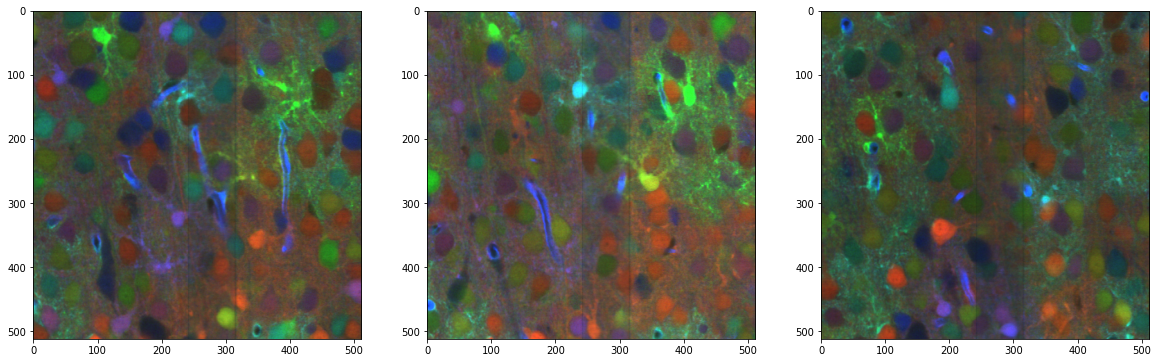

In [7]:
#@markdown ##Play to prepare the code and display images

import os
import sys
import numpy as np
from tqdm.notebook import tqdm
from skimage.io import imread
from skimage.exposure import match_histograms                                                                           

# Clone the repo
%cd /content/ 
if not os.path.exists('BiaPy'):
    !git clone https://github.com/danifranco/BiaPy.git
    !pip install --upgrade --no-cache-dir gdown
    sys.path.insert(0, 'BiaPy')
    %cd /content/BiaPy
    !git checkout d2292a5aa0badcc53350d9c1270355d5d4301eb6
    
    # Install dependencies 
    !pip install git+https://github.com/aleju/imgaug.git
    !pip install numpy_indexed yacs
    
from utils.util import save_tif, norm_range01, reduce_dtype


# Checks
if not os.path.exists(data_path):
    raise ValueError("Defined path not found: {}. Please define 'data_path' path correctly above".format(data_path))


# Show a few examples to check they have been stored correctly 
%matplotlib inline
from numpy.random import randint, seed
from matplotlib import pyplot as plt

ids = sorted(next(os.walk(data_path))[2])
seed(1)
values = randint(0, len(ids), 3)

test1_sample = imread(os.path.join(data_path, ids[values[0]])) 
test2_sample = imread(os.path.join(data_path, ids[values[1]])) 
test3_sample = imread(os.path.join(data_path, ids[values[2]])) 

test1_sample, _ = norm_range01(test1_sample)
test2_sample, _ = norm_range01(test2_sample) 
test3_sample, _ = norm_range01(test3_sample)

test1_sample = test1_sample[randint(0, test1_sample.shape[0], 1)[0]]
test2_sample = test2_sample[randint(0, test2_sample.shape[0], 1)[0]]
test3_sample = test3_sample[randint(0, test3_sample.shape[0], 1)[0]]
                                       
plt.figure(figsize=(20,20))
plt.subplot(1, 3, 1)    
f = 1./np.max(test1_sample)*2
plt.imshow(np.clip(test1_sample*f, 0, 1))
plt.subplot(1, 3, 2)   
f = 1/np.max(test2_sample)*2
plt.imshow(np.clip(test2_sample*f, 0, 1))
plt.subplot(1, 3, 3)    
f = 1/np.max(test3_sample)*2
plt.imshow(np.clip(test3_sample*f, 0, 1))
plt.show()

# **3. Run the code to get the results**


In [4]:
#@markdown ##Play to pass images through the model
job_name = "brainbow_3d_detection_P14_4"
# Download .yaml file and model weights 
%cd /content/

# brainbow_3d_detection_P14_4
!gdown --id 1RdObON24DZaKeGTM7cuaVdizBdm6aJCF
!gdown --id 1u4avvJ9wuNT5d-zuLEsG82OIZ8PfKwTs

# Modify template according to defined variable paths
import fileinput

for line in fileinput.input("/content/"+str(job_name)+".yaml", inplace=True):
    if 'edit_test_path_here' in line:
        print('        PATH: {}'.format(data_path)) 
    else:
        print('{}'.format(line), end='')

# Run the code 
%cd '/content/BiaPy'
!python -u main.py --config '/content/'{job_name}'.yaml' --result_dir {output_path} --dataroot {data_path} --name {job_name} --run_id 1 --gpu 0



/content
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RdObON24DZaKeGTM7cuaVdizBdm6aJCF
To: /content/brainbow_3d_detection_P14_4.yaml
100% 1.56k/1.56k [00:00<00:00, 1.04MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:125: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1u4avvJ9wuNT5d-zuLEsG82OIZ8PfKwTs
To: /content/model_weights_brainbow_3d_detection_P14_4_1.h5
100% 8.93M/8.93M [00:00<00:00, 123MB/s]
/content/BiaPy
Date: 2022-10-24 15:23:42
Arguments: Namespace(config='/content/brainbow_3d_detection_P14_4.yaml', dataroot='/content/gdrive/MyDrive/Universidad/Thesis/Thesis/papers/pol

# **4. Visualize some results**


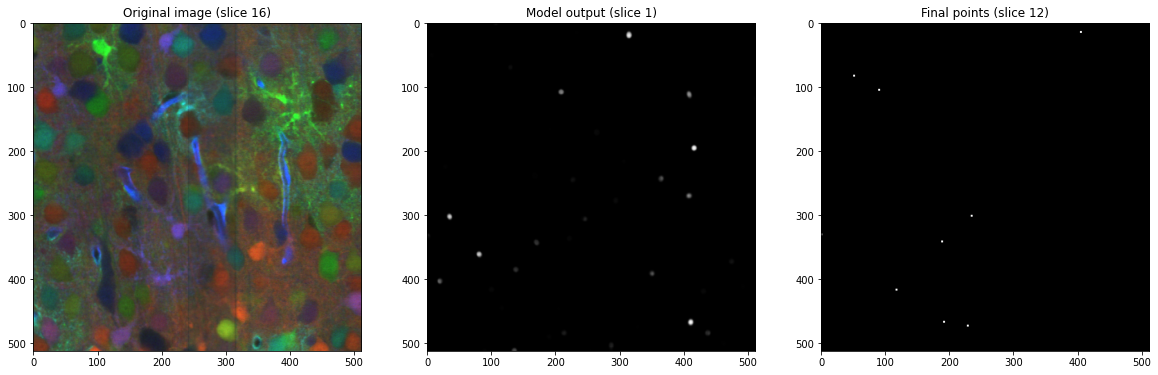

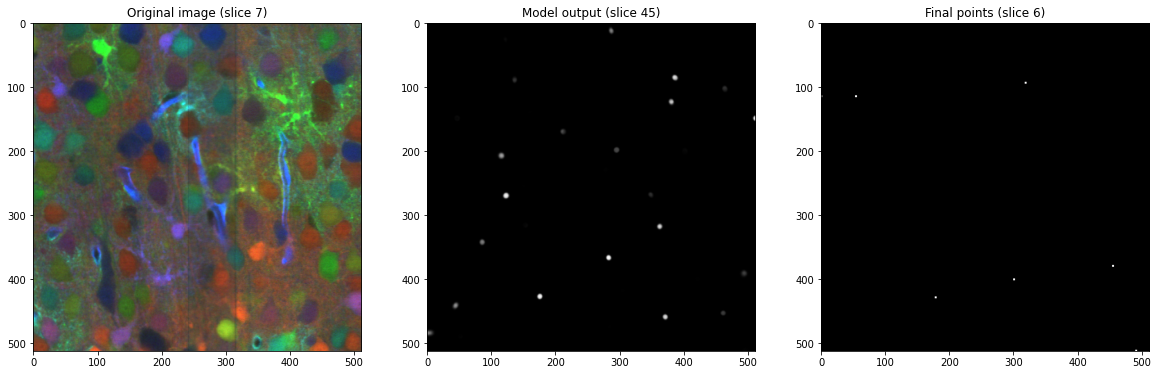

In [6]:
result_dir = os.path.join(output_path, str(job_name)+'/results/'+str(job_name)+'_1/full_image')
final_results = os.path.join(output_path, 'RESULTS')

#@markdown ##Play to visualize some results
from IPython.display import Markdown as md
md("After this last step, the resulting images should be placed in {}".format(final_results))

complete_3d_image = []
num_complete_image = 0
c = 0
peak_dir = os.path.join(output_path, str(job_name)+'/results/'+str(job_name)+'_1/per_image_local_max_check')
prob_dir = os.path.join(output_path, str(job_name)+'/results/'+str(job_name)+'_1/per_image')
ids_prob = sorted(next(os.walk(prob_dir))[2])

# Show a few examples to check that they have been stored correctly 
%matplotlib inline
from numpy.random import randint, seed
from matplotlib import pyplot as plt

for i in range(2):
    plt.figure(figsize=(20,20))
    for j in range(3):
        img_selected = randint(0, len(ids_prob), 1)[0]

        prob_sample = imread(os.path.join(prob_dir, ids_prob[img_selected])) 
        peak_sample = imread(os.path.join(peak_dir, ids_prob[img_selected])) 
        test_sample = imread(os.path.join(data_path, ids_prob[img_selected]))
        slice_selected = randint(0, test_sample.shape[0], 1)[0]

        test_sample, _ = norm_range01(test_sample)

        plt.subplot(i+1, 3, j+1)
        if j == 0:
            plt.title("Original image (slice {})".format(slice_selected))
            test_sample = test_sample[slice_selected]
            f = 1./np.max(test_sample)*2
            test_sample = np.clip(test1_sample*f, 0, 1)
            plt.imshow(test_sample, cmap='gray')            
        elif j==1:
            plt.title("Model output (slice {})".format(slice_selected))
            plt.imshow(prob_sample[slice_selected], cmap='gray')
        else:
            plt.title("Final points (slice {})".format(slice_selected))
            plt.imshow(peak_sample[slice_selected], cmap='gray')
    plt.show()